In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [242]:
dir_path = "~/movielens/ralf"
user_features_path = f"{dir_path}/user_features.csv"
movie_features_path = f"{dir_path}/movie_features.csv"
ratings_path = f"{dir_path}/ratings.csv"

In [243]:
def get_features(file_path):
    df = pd.read_csv(file_path)
    features = dict()
    for row in df.itertuples():
        features[row.id] = np.array(eval(row.features))
    return features 

In [244]:
def get_feature_update(features, row):
    features[row.user_id] = np.array(eval(row.user_features))

In [245]:
user_features = get_features(user_features_path)
movie_features = get_features(movie_features_path)

In [246]:
test_data = pd.read_csv(ratings_path)

In [247]:
experiment_path = "~/experiment_results/17"
feature_updates = pd.read_csv(f"{experiment_path}/results_workers_1_fifo_learningrate_0.02_userfeaturereg_0.01.csv")

In [248]:
len(test_data)

49442

In [249]:
len(test_data[test_data['timestamp'] == 49])

100

In [250]:
len(feature_updates[feature_updates['timestamp'] == 60])

10

In [251]:
max(feature_updates['timestamp'])

79

In [252]:
def predict_rating(user_feature, movie_feature):
    return user_feature.dot(movie_feature.T)

def compute_test_mse(user_features, movie_features):
    predictions = []
    ratings = []
    count = 0
    for row in test_data.itertuples():
        user_id = row.user_id
        movie_id = row.movie_id
        rating = row.rating
        predictions.append(predict_rating(user_features[user_id], movie_features[movie_id]))
        ratings.append(rating) 
    mse = mean_squared_error(ratings, predictions)
    return mse

def compute_baseline():
    predictions = []
    ratings = []
    for row in test_data.itertuples():
        user_id = row.user_id
        movie_id = row.movie_id
        rating = row.rating
        ratings.append(rating)
        predictions.append(predict_rating(user_features[user_id], movie_features[movie_id]))
    return mean_squared_error(ratings, predictions)

def compute_improvement():
    count = 0
    predictions = []
    ratings = []
    max_timestamp = max(feature_updates['timestamp'])
    print(max_timestamp, len(feature_updates), len(test_data))
    baseline = compute_baseline()
    while count <= max_timestamp:
        feature_update_ts = feature_updates[feature_updates['timestamp'] == count] 
        print(len(feature_update_ts))
        for row in feature_update_ts.itertuples():
            user_features[row.user_id] = np.array(eval(row.user_features))
        query_ts = test_data[test_data['timestamp'] == count]
        print(len(query_ts))
        for row in query_ts.itertuples():
            user_id = row.user_id
            movie_id = row.movie_id
            rating = row.rating
            predictions.append(predict_rating(user_features[user_id], movie_features[movie_id]))
            ratings.append(rating)
        count += 1
    new_mse = mean_squared_error(ratings, predictions)
    return baseline, new_mse

In [253]:
mse = compute_improvement()
print(mse)

79 796 49442
0
99
3
100
10
100
8
100
7
100
9
100
9
100
9
100
9
100
10
100
10
100
8
100
7
100
10
100
9
100
9
100
9
100
10
100
9
100
9
100
9
100
10
100
9
100
7
100
9
100
10
100
8
100
9
100
9
100
9
100
10
100
10
100
8
100
8
100
11
100
9
100
9
100
9
100
10
100
8
100
9
100
8
100
9
100
10
100
9
100
10
100
10
100
9
100
9
100
9
100
10
100
10
100
10
100
9
100
10
100
10
100
10
100
10
100
10
100
9
100
10
100
10
100
10
100
10
100
9
100
10
100
10
100
10
100
9
100
10
100
11
100
10
100
10
100
9
100
7
100
11
100
8
100
10
100
8
100
79
100
(0.961755628671233, 0.9407281021776305)


In [254]:
def plot_learning_curve(mse):
        """visualize the training/testing loss"""
        linewidth = 3
        plt.plot(mse, label = 'Ralf', linewidth = linewidth)
        plt.xlabel('iterations')
        plt.ylabel('MSE')
        plt.legend(loc = 'best')

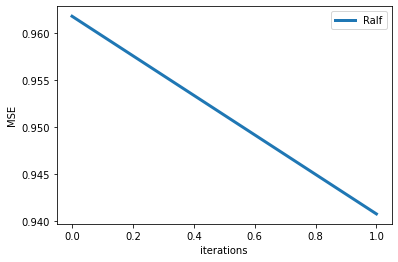

In [255]:
plot_learning_curve(mse)